<a href="https://colab.research.google.com/github/primods/TerritoriaDatosAnalisis/blob/main/Data%2BTerritoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data + Territoria
##Contraste de la interpolación geográfica de reportes de llamadas al 911 por delitos de violencia de género y mapa de la percepción de seguridad en ciudadanas en el centro de Monterrey.

Por: Primo Dothé Sagahón para el equipo de "Data+Territoria" en LabNL (Monterrey, Nuevo León)

###Introducción

En el presente trabajo se abordará un análisis descriptivo y geográfico usando los datos geoetiquetados de reportes por delitos de género al "911" fechados de Enero del 2017 a Septiembre del 2022 para el estado de Monterrey, Nuevo León en México, disponibles en el siguiente <a href="https://datos.monterrey.gob.mx/dataset/reportes-al-911-por-violencia-de-genero/resource/53d838fb-cc1f-45a9-ade5-e6b768c72345">enlace</a>, así como datos geoespaciales recolectados por la colectiva Georregias de puntos categorizados según la percepción de seguridad en ciudadanas por zonas en el centro de Monterrey, y transcritos digitalmente a un mapa online por el equipo de trabajo del Prototipo "Data+Territoria" en el LabNL, disponible ahora desde éste <a href="https://www.google.com/maps/d/edit?mid=1THbE6x28l1SRBV8Bkjkyp1EsmoLuQZs&usp=sharing">enlace</a>.

El área elegida para el análisis es el polígono delimitado por las calles:
* Avenida Cristóbal Colón
* Venustiano Carranza
* Avenida Constitución
* Avenida Félix U. Gómez

Para el análisis descriptivo exploratorio se tomará en cuenta todas las categorías de "descripción al cierre" (en la base de datos como "descripcion_cierre"), y para el análisis geoestadístico sólo aquellas reportadas como "Hecho real", debido a que no se puede determinar el porcentaje de verdaderos negativos en la categoría, y los datos categorizados como hecho real mantienen una proporción suficiente para ser una muestra representativa para la interpolación geográfica, así como un filtrado a aproximadamente dos cuadras de las calles que delimitan el polígono debido a la aleatorización de la geolocalización.

En el análisis descriptivo se realizarán las siguientes mediciones con su respectiva representación gráfica:
* Comparación de porcentajes de datos catalogados al cierre del reporte (Hechos reales vs Falsa alarma)
* Descripción de tales proporciones por Corporación que atiendió
* Probabilidad Bayesiana de que un dato sea catalogado como Falso o verdadero según la corporación que atiende
* Descripción de la proporción del tipo de delito reportado y análisis bayesiano de que sea reportado como real o falso según él mismo.

Para el análisis geoespacial se realizará una interpolación siguiendo los siguientes pasos para los reportes del 911:
* Filtrado de datos según el área delimitada
* Agrupación de los puntos a 100 grupos (Número de puntos aceptables para una interpolación por Krigeaje, según una de las bibliografías consultadas) usando un algoritmos de K-Medias (O K-Means)
* Interpolación de los datos usando la técnica de Variograma/Kriging
* Visualización de los datos en un mapa

Para los reportes percepción en ciudadanas el análisis geoespacial se hará de la siguiente forma:
* Limpieza de los datos y asignación de un valor numérico según la percepción de seguridad (1,5, 10)
* Agrupación a ~100 grupos por densidad y utilizar la moda de los grupos como valor predominante
* Interpolación de los datos usando la técnica de Variograma/Kriging
* Visualización de los datos en un mapa


####¿Qué se espera encontrar con éste prototipo?

Usando las medidas descriptivas se pretende poner en números una realidad que aún no se ha aceptado del todo, la existencia sistemática de delitos por violencia de género en el estado y municipio de Monterrey tomando de muestra un área en específico, y la manera en la que es atentida por las distintas corporaciones policiacas que operan en el estado de Nuevo León.

En el análisis geoespacial de ambos conjuntos de datos, se espera identificar zonas de interés respecto a los delitos reportados, así como determinar si existin zonas en común entre ambos mapas, comparando la realidad material y las perciones de ciudadanas.

####¿Por qué Krigeado? ¿Por qué estadística bayesiano? ¿Dos algoritmos de agrupación?

El Krigeado es un método de interpolación de datos que se prefiere sobre otros métodos de interpolación debido a los siguientes puntos:
* Facilidad de implementación en Python
* Especifícamente creado para datos geoespaciales
* Interpretabilidad (Número estimado de datos, por grillas)
* Robusto, y meos prono a errores comparada a otros métodos

En cuanto al análisis bayesiano, sólo nos limitamos al uso de la fórmula bayesiana que nos permite estimar ciertos valores de interés para el análisis descriptivo inicial. 

La elección de usar K medias y usar DBSCAN viene debido al hecho de que mientras unos datos están uniformemente distribuidos para un set de datos, para el otro la densidad de los puntos varia según la zona, haciendo de K medias una mala elección para agrupar los datos. 

Nota: Sobre el número de puntos para la interpolación, las bibliografías recomiendan de 30 a 50 puntos mínimos para datos bien distribuidos, como el caso de nuestro segundo mapa es de puntos no uniformemente distribuidos se sigue la recomendación de mínimo <a href="https://vsp.pnnl.gov/help/vsample/Kriging_Data.htm#:~:text=At%20least%2030%2D50%20data,amount%20of%20short%20range%20variability.">100 puntos</a> para crear los grupos en ambos casos.

####Sobre las bases de datos

Tal y como dice su <a href="https://datos.monterrey.gob.mx/dataset/reportes-al-911-por-violencia-de-genero/resource/53d838fb-cc1f-45a9-ade5-e6b768c72345?view_id=7170c732-812e-4176-8e5b-d46a5bcf02f8">página</a>:

"Número de reportes que ha recibido el sistema de emergencias 911 para el municipio de Monterrey en el periodo de enero de 2017 a octubre de 2022. Este conjunto de datos contiene información acerca de la fecha, tipo de reporte, modo de recepción, colonia desde la que se realizó el reporte, corporación que atendió el reporte y clasificación de cierre del reporte.

De igual manera cuenta con las coordenadas de latitud y longitud del reporte, lo que permite su geolocalización de una manera anonimizada con la intención de proteger posibles identificaciones de las personas denunciantes.

Los reportes obedecen al Catálogo Nacional de Incidentes de Emergencia."

La página ofrece documentación al respecto de cada unas de sus 12 columnas y sus 139385 entradas. 

####Librerías usadas en éste trabajo



* Pandas para manejo de bases de datos
* Geopandas para el manejo de bases de datos geoespaciales
* Numpy para operaciones matemáticas
* Shapely para poligonizar el area delimitada y limpiar grillas de datos geoespaciales
* Matplotlib, Seaborn, Cartopy, y Folium para la visualización de datos
* Sklearn para el algoritmos de K-Means, y DBSCAN
* Skgstat para el análisis geoestadístico

###Desarrollo del prototipo

En el desarrollo se realizarán las siguientes tareas:

* Carga de los datos
* Limpieza de los datos según el área delimitada
* Análisis descriptivo y utilización de la fórmula Bayesiana para obtener valores de interés
* Visualización de los datos descriptivos
* Hallazgos y conclusiones de los datos descriptivos
* Interpolación de los datos de reportes por delitos de género al 911
* Agrupar los datos de percepciones por densidad, y hacer una "votación" para asignar a ese punto una "percepción de seguridad" dominante
* Interpolación de los datos de percepciones de seguridad en ciudadanas
* Visualización de éstos datos en un mapa
* Hallazgos y conclusiones de los datos geoespaciales

Se irá puntualizando y comentando el código según se requiera.

###Datos exploratorios

In [1]:
#Se desactivan las alertas ya que ninguna
#es relevante para el prototipo además de hacerlo
#más estético

import warnings
warnings.filterwarnings('ignore')

#también se limpiaran algunas celdas
from IPython.display import clear_output

In [2]:
#La libreta se armó en Google CoLab, se instalan las librerías faltantes
!pip install cartopy

!pip install scikit-gstat

!pip install geopandas

#Ésta instalación evita el crasheo de cartopy en Google CoLab
!pip install --no-binary shapely shapely --force

clear_output(wait=False)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import skgstat as skg
from skgstat import OrdinaryKriging
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import geopandas as gpd
from shapely.geometry import MultiLineString
from shapely.ops import polygonize


sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")

In [4]:
#Carga del polígono de puntos. Disponible en los datos
#digitalizados, ésta lista de polígonos fue previamente 
#limpiada y disponible en el repositorio

lista_puntos = []

for i in list(pd.read_csv("PPOL.csv")["WKT"]):
  x = i.split(",")
  lista_puntos.append((float(x[1]),float(x[0])))

#Cálculo de un centroide empírico para los puntos

centroide = tuple(np.round(np.sum(lista_puntos, axis=0)/60,7))


In [5]:
#Creación de función para calcular puntos incluidos dentro del
#área elegida 

def puntoincluido(puntogeo_data):
  lista_puntos_filtrado = []
  for j in range(len(puntogeo_data)):
    punto_a_filtrar = tuple(puntogeo_data.iloc[j])
    distancias_ = []
    for i in lista_puntos:
      dist_ = np.linalg.norm(np.array(punto_a_filtrar) - np.array(i))
      distancias_.append(dist_)

    dist_sort = np.sort(distancias_)[:2] 

    p1 = np.array(lista_puntos[distancias_.index(dist_sort[0])])

    p1_c = np.linalg.norm(p1 - np.array(centroide))
    pgeo_c = np.linalg.norm(np.array(punto_a_filtrar)-np.array(centroide))
    
    if (pgeo_c <= p1_c):
      lista_puntos_filtrado.append(punto_a_filtrar)
    else:
      None
  
  return lista_puntos_filtrado

In [6]:
#Se carga la base de datos de llamadas al 911

rep911Gen = pd.read_csv("https://datos.monterrey.gob.mx/dataset/1ee97cd2-343b-4311-b69d-0a78eea40734/resource/53d838fb-cc1f-45a9-ade5-e6b768c72345/download/violencia_geocoded_noise_anonymized.csv")

In [7]:
rep911Gen.head()

numero_reporte     fecha  municipio                colonia estado  \
0       170000290  01/01/17  Monterrey  San bernabe 9 fom 112     NL   
1       170000476  01/01/17  Monterrey          Independencia     NL   
2       170000494  01/01/17  Monterrey        Gloria mendiola     NL   
3       170000558  01/01/17  Monterrey          Independencia     NL   
4       170000567  01/01/17  Monterrey          Independencia     NL   

      descripcion_tipo corporacion hora_recepcion descripcion_cierre  \
0   Violencia familiar    FZACIVIL        0:20:24       Falsa alarma   
1   Violencia familiar    FZACIVIL        0:34:01       Falsa alarma   
2   Violencia familiar    FZACIVIL        0:35:24         Hecho real   
3   Violencia familiar    FZACIVIL        0:39:58    No especificado   
4  Violencia de pareja    FZACIVIL        0:40:22       Falsa alarma   

     latitud    longitud via_recepcion  
0  25.766637 -100.371554      Telefono  
1  25.658518 -100.331530      Telefono  
2  25.772323 -100.359753      Telefono  
3  25.658936 -100.330733      Telefono  
4  25.657930 -100.325391      Telefono

In [8]:
#Delimitar la base de datos al área

rep911GenAreaTodos = rep911Gen[["latitud","longitud"]]

#aplicación de la función para filtrar puntos
puntos911AreaTodos = puntoincluido(rep911GenAreaTodos)

#Mascara para filtrar los puntos
maskDF = pd.DataFrame(puntos911AreaTodos, columns=["latitud","longitud"])
#Dataframe de los reportes del 911 por delito de género
#en el área delimitada filtrando por índices de elementos en común
indicesDF = rep911GenAreaTodos[(rep911GenAreaTodos.latitud.isin(maskDF.latitud)) & (rep911GenAreaTodos.longitud.isin(maskDF.longitud))].index
rep911GenAreaDel = rep911Gen.iloc[indicesDF]

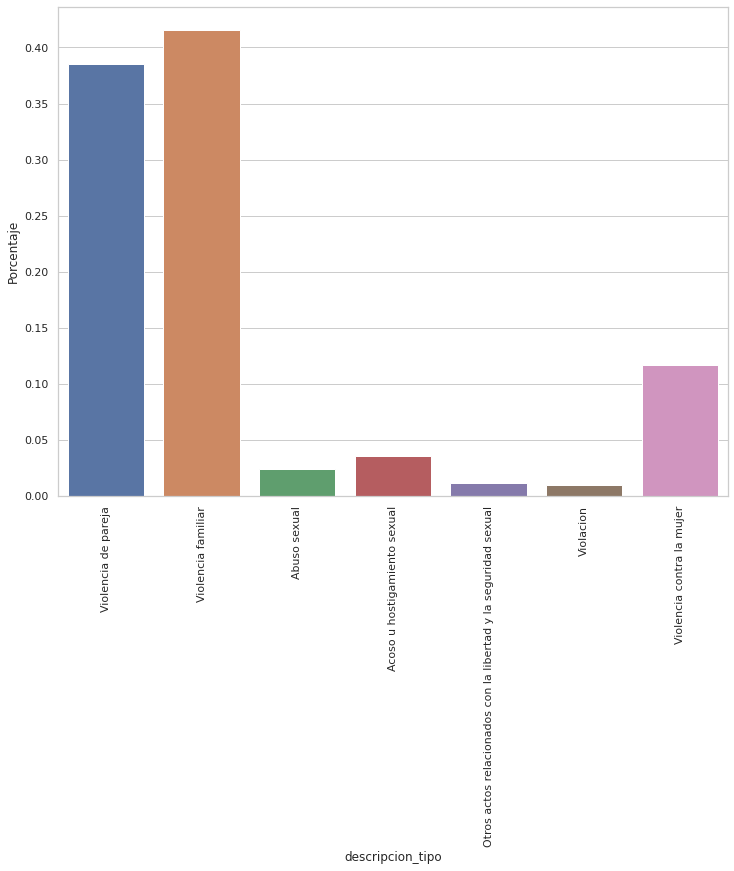

In [9]:
#Gráfica de barra para visualizar los porcentajes
graficaTipo = sns.barplot(data=rep911GenAreaDel,x="descripcion_tipo",
            y=np.arange(0,len(rep911GenAreaDel)),ci=None,
            estimator = lambda x: np.sum(x==x)/len(rep911GenAreaDel))

plt.ylabel("Porcentaje")

for item in graficaTipo.get_xticklabels():
    item.set_rotation(90)

In [10]:
#Porcentajes del tipo de violencia en el área delimitada
rep911GenAreaDel.groupby("descripcion_tipo").count().numero_reporte/(len(rep911GenAreaDel))*100

descripcion_tipo
Abuso sexual                                                       2.413465
Acoso u hostigamiento sexual                                       3.588441
Otros actos relacionados con la libertad y la seguridad sexual     1.190854
Violacion                                                          1.016196
Violencia contra la mujer                                         11.733884
Violencia de pareja                                               38.520165
Violencia familiar                                                41.536996
Name: numero_reporte, dtype: float64

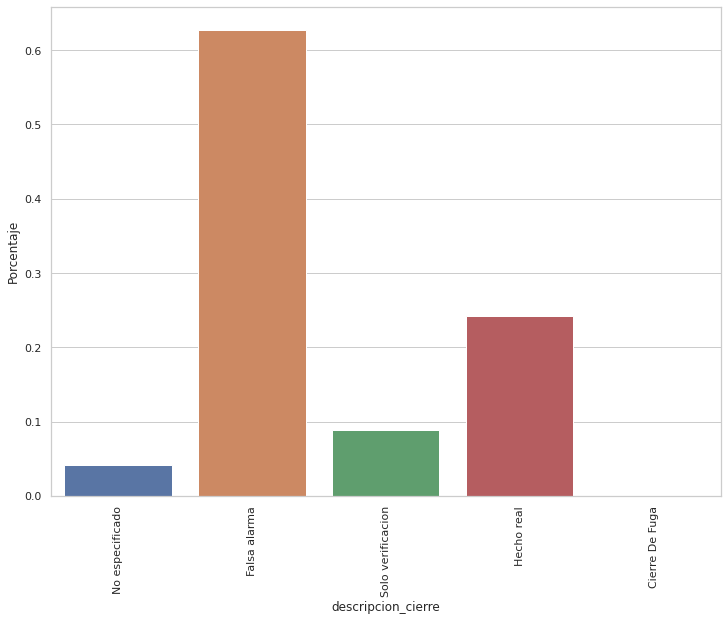

In [11]:
#Clasificación de los reportes al cierre del caso

graficaCierre = sns.barplot(data=rep911GenAreaDel,x="descripcion_cierre",
            y=np.arange(0,len(rep911GenAreaDel)),ci=None,
            estimator = lambda x: np.sum(x==x)/len(rep911GenAreaDel))

plt.ylabel("Porcentaje")

for item in graficaCierre.get_xticklabels():
    item.set_rotation(90)

In [12]:
#Cálculo de porcentajes de cierre
rep911GenAreaDel.groupby("descripcion_cierre").count().numero_reporte/(len(rep911GenAreaDel))*100

descripcion_cierre
Cierre De Fuga        0.015878
Falsa alarma         62.702445
Hecho real           24.166402
No especificado       4.160051
Solo verificacion     8.955224
Name: numero_reporte, dtype: float64

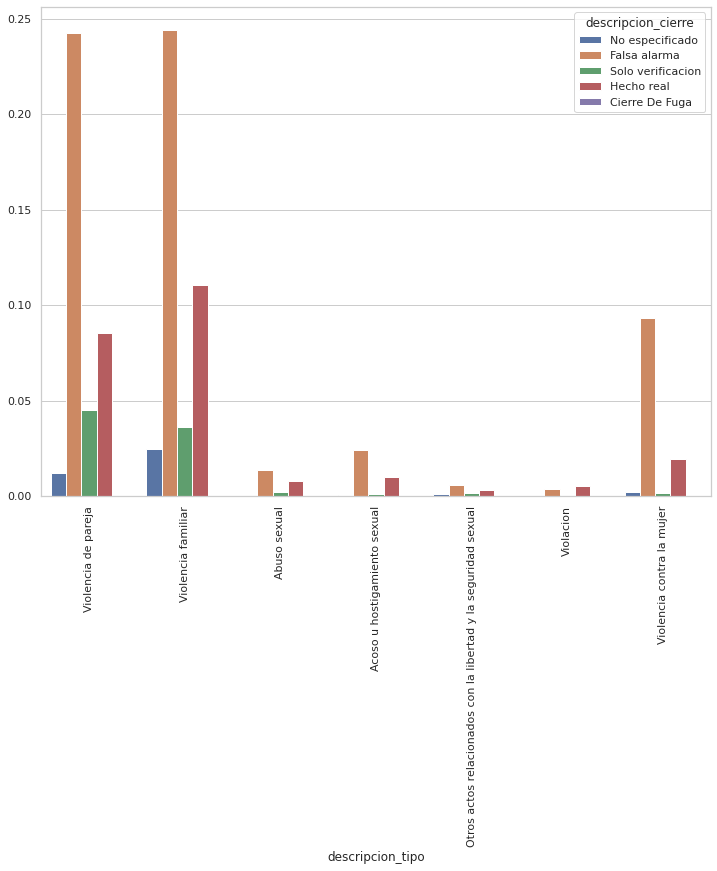

In [13]:
#Gráfica por descrpción al cierre y tipo de caso
graficaTipo = sns.barplot(data=rep911GenAreaDel,x="descripcion_tipo",
            y=np.arange(0,len(rep911GenAreaDel)), hue="descripcion_cierre",ci=None,
            estimator = lambda x: np.sum(x==x)/len(rep911GenAreaDel))

for item in graficaTipo.get_xticklabels():
    item.set_rotation(90)

In [14]:
#Porcentajes para descrpción al cierre y tipo de caso
repDC = pd.DataFrame(rep911GenAreaDel.groupby(["descripcion_tipo","descripcion_cierre"]).count().numero_reporte/(len(rep911GenAreaDel))*100)
repDC.columns = ["porcentaje"]

repDC


porcentaje
descripcion_tipo                                   descripcion_cierre            
Abuso sexual                                       Falsa alarma          1.349635
                                                   Hecho real            0.809781
                                                   No especificado       0.031756
                                                   Solo verificacion     0.222293
Acoso u hostigamiento sexual                       Falsa alarma          2.413465
                                                   Hecho real            0.984440
                                                   No especificado       0.063512
                                                   Solo verificacion     0.127024
Otros actos relacionados con la libertad y la s... Falsa alarma          0.571610
                                                   Hecho real            0.317561
                                                   No especificado       0.111146
                                                   Solo verificacion     0.190537
Violacion                                          Falsa alarma          0.381073
                                                   Hecho real            0.523976
                                                   No especificado       0.031756
                                                   Solo verificacion     0.079390
Violencia contra la mujer                          Falsa alarma          9.352175
                                                   Hecho real            1.953001
                                                   No especificado       0.238171
                                                   Solo verificacion     0.190537
Violencia de pareja                                Falsa alarma         24.245792
                                                   Hecho real            8.526516
                                                   No especificado       1.238488
                                                   Solo verificacion     4.509368
Violencia familiar                                 Cierre De Fuga        0.015878
                                                   Falsa alarma         24.388695
                                                   Hecho real           11.051127
                                                   No especificado       2.445221
                                                   Solo verificacion     3.636075

De ésta primera exploración en los datos filtrados en el área elegida correspondiente al centro de Monterrey parte de sus alrededores, podemos concluir los siguientes puntos:

* Los dos grandes tipos de violencia reportada son Violencia de pareja (correspondiente al 38.8% de los reportes), la primera es Violencia familiar (con un 41.44 de los casos).

* En cuanto al descripción al cierre tenemos que el grupo más grande es el etiquetado como Falsa alarma (62.35% de los casos), y el segundo siendo "Hecho real" (24.34% de los casos). Ésto es importante ya que <a href="https://twitter.com/onumujeresmx/status/1114573782033797123?lang=en">ONU Mujeres México</a> reporta que menos del 3% de los casos reportados como falsos son realmente falsos, además de que en 2021 se estimó que en el 93.2% de los deitos de género <a href="https://www.washingtonpost.com/es/post-opinion/2022/11/24/25n-dia-violencia-contra-mujer-mexico-feminicidios/">no fueron reportados</a>.

Éste punto es importante al momento de trasladar nuestras cifras a un estimado poblacional, ya que tanto la categoría de "Falsa alarma" como los que no fueron reportados corresponden a la cifra negra de los datos.

* Relacionado a ésto, en la última gráfica se cálcula que de las dos grandes categorías, Violencia familiar y violencia de pareja, solo el 11.2% y 8.6% de los datos fueron etiquetados como hechos reales, respectivamente.


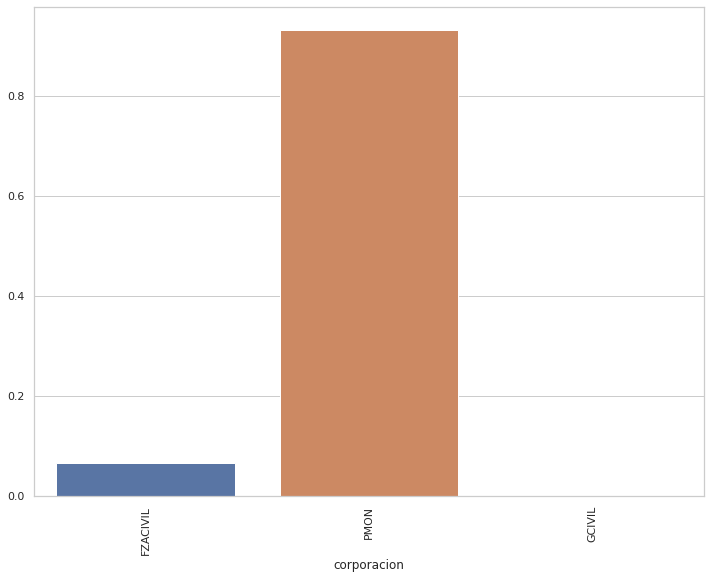

In [15]:
#Gráfica de clasificación de corporación que atendió

graficaTipo = sns.barplot(data=rep911GenAreaDel,x="corporacion",
            y=np.arange(0,len(rep911GenAreaDel)),ci=None,
            estimator = lambda x: np.sum(x==x)/len(rep911GenAreaDel))

for item in graficaTipo.get_xticklabels():
    item.set_rotation(90)

In [16]:
#Cálculo de porcentajes de corporación que atendió
rep911GenAreaDel.groupby("corporacion").count().numero_reporte/(len(rep911GenAreaDel))*100

corporacion
FZACIVIL     6.779930
GCIVIL       0.047634
PMON        93.172436
Name: numero_reporte, dtype: float64

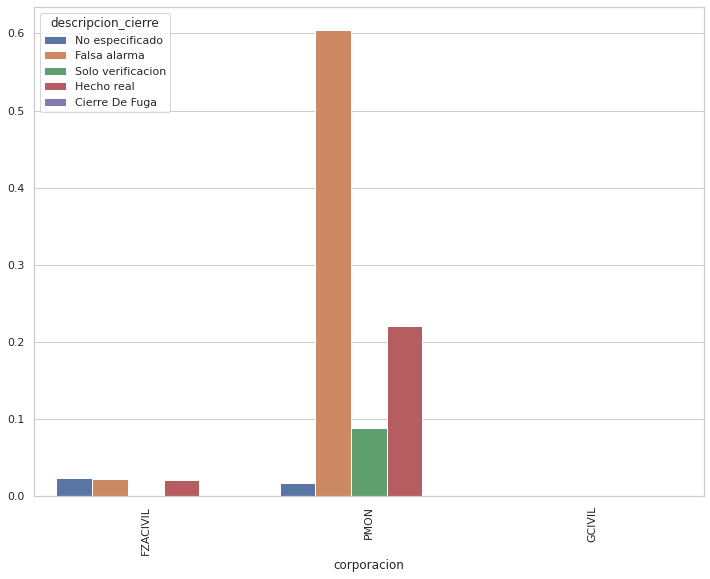

In [17]:
#Gráfica de clasificación de descripcion al cierre vs corporación
#que atendió

graficaTipo = sns.barplot(data=rep911GenAreaDel,x="corporacion",
            y=np.arange(0,len(rep911GenAreaDel)), hue="descripcion_cierre",ci=None,
            estimator = lambda x: np.sum(x==x)/len(rep911GenAreaDel))

for item in graficaTipo.get_xticklabels():
    item.set_rotation(90)

In [18]:
df = rep911GenAreaDel.reset_index()


In [19]:
#Cálculo de porcentajes de descripción al cierre vs
#corporación que atendió

repCOR = pd.DataFrame(rep911GenAreaDel.groupby(["corporacion","descripcion_cierre"]).count().numero_reporte/(len(rep911GenAreaDel))*100)

repCOR.columns = ["porcentaje"]

repCOR

porcentaje
corporacion descripcion_cierre            
FZACIVIL    Falsa alarma          2.302318
            Hecho real            2.080025
            No especificado       2.334074
            Solo verificacion     0.063512
GCIVIL      Falsa alarma          0.015878
            No especificado       0.031756
PMON        Cierre De Fuga        0.015878
            Falsa alarma         60.384249
            Hecho real           22.086377
            No especificado       1.794220
            Solo verificacion     8.891712

####Análisis Bayesiano sobre la probabilidad de haber sido atentido por la policía de Monterrey si el caso reportado fue reportado como "falsa alarma"

Siendo "GCVIL" la Guardia Civil, "PMON" la Policía de Monterrey, y "FZACIVIL" Fuerza Civil, respectivamente.

La formula de Bayes nos dice que

$$P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

Es decir, la probabilidad de que suceda A cuando B ya sucedio.

El valor que ahora queremos obtener es la probabilidad de que te haya atendido Policía de Monterrey cuando el delito es categorizado como "Falsa Alarma", es decir

$$P(\text{PMON} | \text{Falsa Alarma}) = \frac{P(\text(PMON)*P(\text{Falsa Alarma} | \text{PMON})}{P(\text{Falsa Alarma})}$$

Valores que ya han sido estimados anteriormente, solo nos falta estimar el porcentaje de falsa alarma vs otros reportes para cada corporación. Cálculo que se hace a continuación.

In [20]:
rep911AreaBayes = rep911GenAreaDel

rep911AreaBayes["cierre"] = rep911AreaBayes["descripcion_cierre"].map({'Falsa alarma':'Falsa alarma'}).fillna('Otro')


In [21]:
print("Porcentaje PMON")
print(
rep911AreaBayes.groupby(["corporacion","cierre"]).count().numero_reporte.loc["PMON"]/sum(rep911AreaBayes.groupby(["corporacion","cierre"]).count().numero_reporte.loc["PMON"]))
print(".........")
print("Porcentaje FZACIVIL")
print(
rep911AreaBayes.groupby(["corporacion","cierre"]).count().numero_reporte.loc["FZACIVIL"]/sum(rep911AreaBayes.groupby(["corporacion","cierre"]).count().numero_reporte.loc["FZACIVIL"]))
print(".........")
print("Porcentaje GCIVIL")
print(
rep911AreaBayes.groupby(["corporacion","cierre"]).count().numero_reporte.loc["GCIVIL"]/sum(rep911AreaBayes.groupby(["corporacion","cierre"]).count().numero_reporte.loc["GCIVIL"]))
print(".........")

Porcentaje PMON
cierre
Falsa alarma    0.648091
Otro            0.351909
Name: numero_reporte, dtype: float64
.........
Porcentaje FZACIVIL
cierre
Falsa alarma    0.339578
Otro            0.660422
Name: numero_reporte, dtype: float64
.........
Porcentaje GCIVIL
cierre
Falsa alarma    0.333333
Otro            0.666667
Name: numero_reporte, dtype: float64
.........


In [22]:
#Cálculamos los estimados de la probabilidad bayesiana

pPMON = .93077173
pFAPMON = 0.644661
pFA =  .62354086

pPMONFA = (pPMON*pFAPMON)/pFA*100

pGCI =  0.00048638
pFAGCI = 0.333333

pGCIFA = (pGCI*pFAGCI)/pFA*100


pFCI = .06874189
pFAFCI = 0.339623

pFCIFA = (pFCI*pFAFCI)/pFA*100

In [23]:
pd.DataFrame([(pPMONFA,pGCIFA,pFCIFA)], columns=["P para PMON","P para GCIVIL","P para FZACIVIL"])

P para PMON  P para GCIVIL  P para FZACIVIL
0    96.229818       0.026001         3.744153

Concluimos que la probabilidad de haber sido atentido por la Policía de Monterrey en caso de que el reporte se haya etiquetado como "Falsa alarma" es más alta comparada a otras corporaciones.

Ésto puede deberse a distintos factores que se encuentran fuera del alcance de éste reporte.

###Estimación de paramétros mediante una distribución de Poisson

En la siguiente tarea se agruparán los datos por año para ser ajustada a una distribución de Poission y hacer un estimado de eventos esperados por día.

Nota: El período es de 5 años y 9 meses, se tomará el ultimo año como un año completo dentro de la estimación.

Aquí haremos el primer filtrado, considerando sólo descripción al cierre considerada como "Hecho real".

La fórmula de distribución dice que la probabilidad de un cierto número de eventos es

$$P(X=x) = \frac{\lambda^{x}}{x!}e^{-\lambda}$$

Donde $x$ es el valor a estimar, $\lambda$ es la media esperada por período, y $e$ es el número de Euler

In [24]:
rep911GenAreaAnual = rep911GenAreaDel[rep911GenAreaDel["descripcion_cierre"]=="Hecho real"]

rep911GenAreaAnual["Periodo"] = [x[-2:] for x in rep911GenAreaAnual["fecha"]]

repPoiss = rep911GenAreaAnual.groupby("Periodo")[["numero_reporte"]].count().reset_index()
repPoiss.columns = ["Periodo","conteo"]

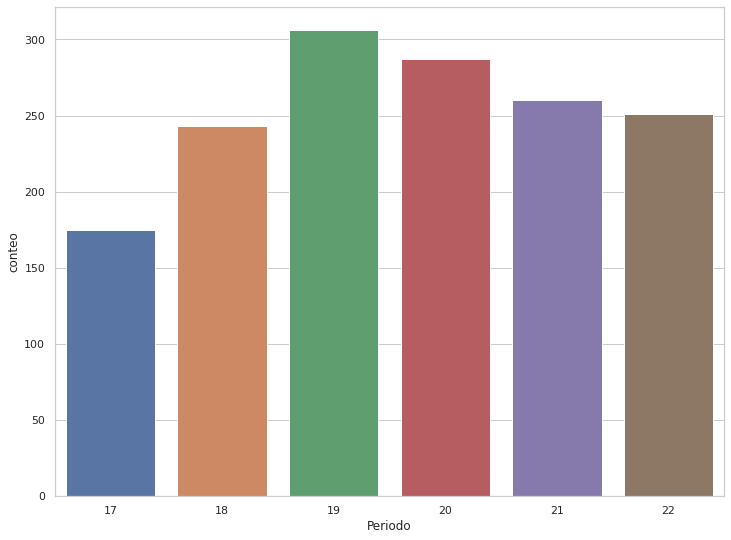

In [25]:
#Gráfica de eventos por período anual
sns.barplot(data=repPoiss, x="Periodo", y="conteo")

In [26]:
#Estimación de lambda

lambdaAnual = repPoiss["conteo"].sum()/6

lambdaDia = lambdaAnual/365

print(lambdaAnual, lambdaDia)

253.66666666666666 0.6949771689497717


In [27]:
#Definimos una función para calcular la probabilidad de que ocurra 1 evento o más en un día

def probPoisson(lambdaestimada,valor):
  return ((lambdaestimada**(valor))/np.math.factorial(valor))*(np.e**(-lambdaestimada))

In [28]:
#calculamos el porcentaje de datos etiquetados como "Hecho real" vs los demás

rep911HRvOtros = rep911GenAreaDel


rep911HRvOtros["cierre"] = rep911HRvOtros["descripcion_cierre"].map({'Hecho real':'Hecho real'}).fillna('Otro')

In [29]:
rep911AreaBayes.groupby("cierre")["cierre"].count()/len(rep911HRvOtros)

cierre
Hecho real    0.241664
Otro          0.758336
Name: cierre, dtype: float64

In [30]:
#Calculamos el procentaje ajustado de datos etiquetados como reales
#para aproximar a una población

porcHR = (1-(0.756647-0.03))

porcHR

0.27335300000000007

Aquí haremos uso de las suposiciones anteriores para obtener un estimado sustituto para todos los casos de violencia de género (reportados o no).

Primero tengamos en cuenta que aproximadamente el 93.2% de los casos no se reportan, despues tengamos en cuenta que aproximadamente 3% de los casos reportados. Es decir, nuestra muestra del 100% de reportes representa un estimado del 6.8% de que realmente sucedieron.

De 6.8% tenemos un 27.335%. Es decir, cualquier estimado sólo representaría un 1.86% de la ocurrencia de cualquier delito de género. Carecemos de un total de 98.14% de los casos.

Con éste valor podemos estimar un valor aproximado real de ocurrencia de delitos de género de cualquier tipo sea reportado o no.

In [31]:
lambdaDiaCorregida = (lambdaDia*100)/1.86

lambdaDiaCorregida

37.36436392203073

Es decir, estimamos una ocurrencia de ~37 de delitos de género en el área delimitada de cualquier tipo por día.

Ahora se procede a calcular la ocurrecia de al menos 1 evento al día.

In [32]:
1-probPoisson(lambdaDiaCorregida,0)

0.9999999999999999

El valor aproximado es cercano a la unidad, es decir:

Con el nuevo estimado, existe casi una certeza de que al menos un délito de género ocurrirá en el área delimitada en cualquier día

###Interpolación de mapas de reportes al 911 y reportes de percepción de seguridad en ciudadanas

####Acerca de los mapas de percepción de seguridad



La toma de datos se hizo con una metodología de campo por la colectiva Georregias, encuestando a ciudadanas sobre las zonas, dónde "Se sintieran inseguras", "ansiosas", y "seguras", marcándolas en un mapa físico de la zona delimitada específicada anteriormente con colores rojo, amarillo, y verde respectivamente.

Debido a que muchas zonas tienen "clasificación" mixta, la técnica de limpieza elegida es agrupación por densidad, y asignar a ese grupo el valor que más se repita dentro del mismo (moda del grupo).

El mapa en físico se digitalizó manualmente por el equipo del Proyecto Prototipo "Data+Territoria" en las sesiones de LabNL.

####Nueva interpretación de los datos

Con el tratamiento estadístico dado anteriormente, se pretende identificar zonas donde la probabilidad de que ocurra un delito de género de cualquier tipo aumente dentro del área que se delimitó, entiéndase ésto como: Un aumento en el riesgo por zona, usando como estimador aproximado los datos etiquetados como "Hecho real"

####Interpolación usando método de Krigeaje

In [33]:
rep911HRAreaDel = rep911GenAreaDel[rep911GenAreaDel["descripcion_cierre"]=="Hecho real"]

In [34]:
rep911HRAreaDel

numero_reporte     fecha  municipio              colonia estado  \
497          170075025  01/08/17  Monterrey  Centro de monterrey     NL   
592          170102005  01/10/17  Monterrey  Centro de monterrey     NL   
703          170135086  13/01/17  Monterrey     Alianza sector k     NL   
1124         170231001  20/01/17  Monterrey              Sarabia     NL   
1128         170231463  20/01/17  Monterrey  Centro de monterrey     NL   
...                ...       ...        ...                  ...    ...   
138878       223506691  24/10/22  Monterrey  Centro de monterrey     NL   
139094       223545154  28/10/22  Monterrey           Industrial     NL   
139097       223545436  28/10/22  Monterrey  Centro de monterrey     NL   
139207       223567493  29/10/22  Monterrey  Centro de monterrey     NL   
139352       223587883  31/10/22  Monterrey  Centro de monterrey     NL   

           descripcion_tipo corporacion hora_recepcion descripcion_cierre  \
497      Violencia familiar        PMON        3:32:58         Hecho real   
592     Violencia de pareja        PMON       20:23:10         Hecho real   
703     Violencia de pareja    FZACIVIL       12:31:26         Hecho real   
1124     Violencia familiar        PMON        0:24:06         Hecho real   
1128    Violencia de pareja        PMON        2:26:37         Hecho real   
...                     ...         ...            ...                ...   
138878   Violencia familiar        PMON       15:39:41         Hecho real   
139094   Violencia familiar        PMON        3:05:40         Hecho real   
139097   Violencia familiar        PMON        4:47:41         Hecho real   
139207  Violencia de pareja        PMON       22:58:59         Hecho real   
139352  Violencia de pareja        PMON       13:26:36         Hecho real   

          latitud    longitud via_recepcion      cierre  
497     25.674312 -100.300177      Telefono  Hecho real  
592     25.666829 -100.317261      Telefono  Hecho real  
703     25.686722 -100.315887      Telefono  Hecho real  
1124    25.686961 -100.315053      Telefono  Hecho real  
1128    25.677792 -100.324367      Telefono  Hecho real  
...           ...         ...           ...         ...  
138878  25.681193 -100.312965      Telefono  Hecho real  
139094  25.689119 -100.328469      Telefono  Hecho real  
139097  25.673651 -100.320946      Telefono  Hecho real  
139207  25.678636 -100.322311   Sala crisis  Hecho real  
139352  25.675104 -100.318766      Telefono  Hecho real  

[1522 rows x 13 columns]

In [35]:
rep911HRAreaDel.to_csv("ReporteCasos911AREA.csv")

In [36]:
#Visualizamos los datos usando Folium

hrMapa = folium.Map(location=centroide, zoom_start=15, tiles="Stamen Toner")

for _, reporte in rep911HRAreaDel.iterrows():
  icon=folium.Icon(color="pink")
  marker = folium.Marker(location=(reporte.latitud, reporte.longitud),
                                     icon=icon,
                                     tooltip=f"Fecha: {reporte.fecha}. Hora: {reporte.hora_recepcion} Tipo: {reporte.descripcion_tipo}")
  marker.add_to(hrMapa)


hrMapa

In [37]:
#Se procede a agrupar los datos usando K medias a 150 grupos

kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(rep911HRAreaDel[["latitud","longitud"]].values)

rep911HRAreaDel["grupo"] = kmeans.labels_


rep911HRAreaDel_agrupados = rep911HRAreaDel.groupby("grupo").count().reset_index()[["grupo","latitud"]]
rep911HRAreaDel_agrupados.columns = ["grupo","conteo"]
rep911HRAreaDel_agrupados[["latitud","longitud"]] = 0

rep911HRAreaDel_agrupados

#Se calcula un centroide para cada nuevo grupo

for i in rep911HRAreaDel_agrupados["grupo"]:
  len_ = len(rep911HRAreaDel[rep911HRAreaDel["grupo"]==i]["latitud"])
  lat_ = np.sum(rep911HRAreaDel[rep911HRAreaDel["grupo"]==i]["latitud"])/len_
  lon_ = np.sum(rep911HRAreaDel[rep911HRAreaDel["grupo"]==i]["longitud"])/len_
  rep911HRAreaDel_agrupados.loc[rep911HRAreaDel_agrupados['grupo']==i,"latitud"] = lat_
  rep911HRAreaDel_agrupados.loc[rep911HRAreaDel_agrupados['grupo']==i,"longitud"] = lon_

In [38]:
#Calculamos el porcentaje de reportes
rep911HRAreaDel_agrupados["Porcentaje_reportes"]=list(rep911HRAreaDel_agrupados["conteo"]/np.sum(rep911HRAreaDel_agrupados["conteo"])*100)

In [39]:
#Dividamos los reportes según el porcentaje que aportan a la muestra
#Para una mejor visualización en el mapa

rep911HRAreaDel_agrupados["Porcentaje_reportes"].describe()

count    100.000000
mean       1.000000
std        0.499907
min        0.197109
25%        0.657030
50%        0.919842
75%        1.248357
max        3.022339
Name: Porcentaje_reportes, dtype: float64

In [40]:
#Visualizamos los grupos creados
#en un mapa. Asignando puntos de corte, color rojo los que aporten
#más de 1.24% (mayor al 75% de los datos) al porcentaje total, de color naranja 
#el valor de la media, y verdes los restantes

hrMapaGrupos = folium.Map(location=centroide, zoom_start=15, tiles="Stamen Toner")

for _, reporte in rep911HRAreaDel_agrupados.iterrows():
  if reporte.Porcentaje_reportes>1.24:
    icon=folium.Icon(color="red")
  elif reporte.Porcentaje_reportes>=1:
    icon=folium.Icon(color="orange")
  else:
    icon=folium.Icon(color="green")
  marker = folium.Marker(location=(reporte.latitud, reporte.longitud),
                                     icon=icon,
                                     tooltip=f"Grupo: {reporte.grupo}. Porcentaje de denuncias: {reporte.Porcentaje_reportes}%")
  marker.add_to(hrMapaGrupos)


hrMapaGrupos

Visualmente podemos darnos cuenta que existen zonas donde se concentran un mayor procentaje de reportes por delitos de género. Usando la interpolación por Krigeaje los datos podrán extenderse a zonas donde se carecen de datos, y la interpretación sera más visual e interpretable.

exponential Variogram
---------------------
Estimator:         matheron
Effective Range:   0.02
Sill:              70.33
Nugget:            0.00
        


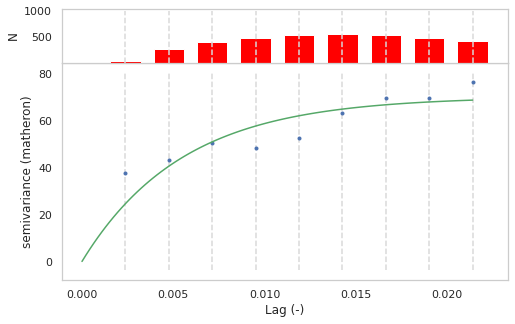

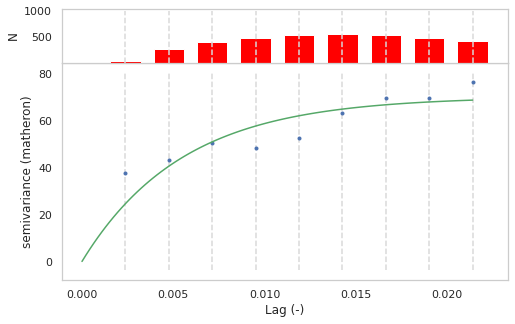

In [41]:
#Se crea un variograma para ajustar los datos
#a sus parámetros óptimos, ajustamos distancia de 0.5, con 9 subgrupos
#de distancia como parámetros empíricos obtenidos por inspección de Variograma

VHR = skg.Variogram(rep911HRAreaDel_agrupados[["latitud","longitud"]].values,
                  np.reshape(rep911HRAreaDel_agrupados[["conteo"]].values,[100,]),
                  normalize=False,
                  model="exponential")#Se escogió un modelo exponencial
VHR.maxlag = 0.5
VHR.n_lags = 9
print(VHR)
VHR.plot()

Text(0.5, 1.0, 'Identificación de zonas donde se realizaron\nun mayor número de llamadas al 911 por delitos de género.\n')

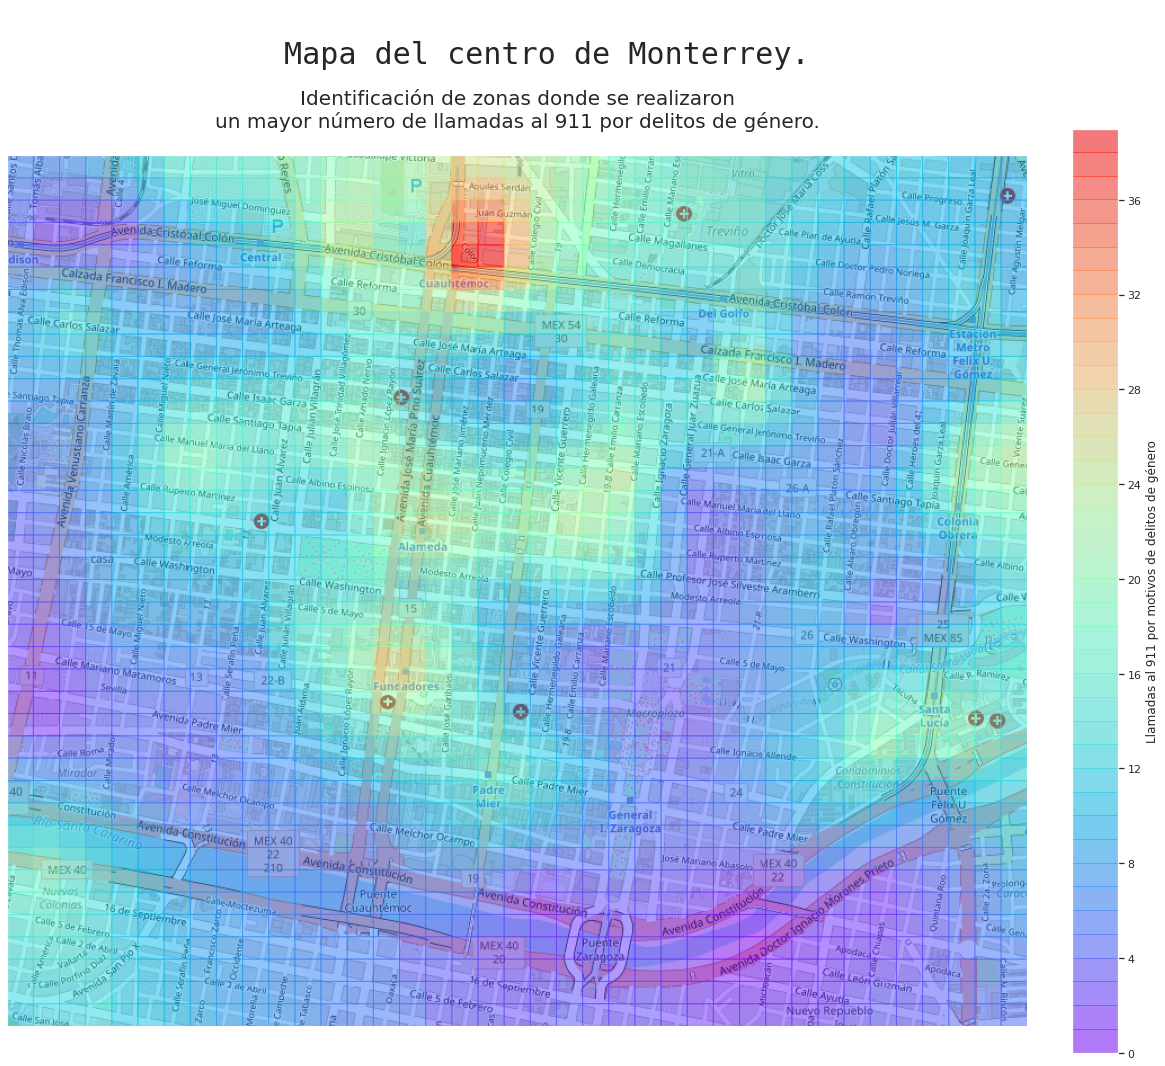

In [42]:
#Krigeamos los datos, con los parámetros obtenidos en el variograma

ok = OrdinaryKriging(VHR, min_points=4, max_points=20, mode='estimate')#Dado de los grupos están distribuidos
                                                                       #casi de form homogénea, se elige el modo
                                                                       #estimado, con un mínimo de puntos y un máximo
                                                                       #de 20 puntos por área de interpolación

xx, yy = np.mgrid[25.66:25.69:40j,-100.334:-100.295:40j] #Se hace una grilla a 40 puntos geo espaciales
                                                         #ya que aproxima el tamaño de una cuadra
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape) #se transforman los datos

#Se grafican en un mapa de cartopy
#El nueo tamañano para lo gráficos se específica usando Seaborn
sns.set(rc={'figure.figsize':(20,17)})



#Se delitima el espacio para el mapa
extent=(-100.334, -100.295,25.66, 25.69)
lon = np.linspace(extent[0],extent[1],field.shape[0])
lat = np.linspace(extent[2],extent[3],field.shape[1])
#Se hace una grilla con las cordenadas del área
Lat,Lon = np.meshgrid(lat,lon)

#Se crea un objeto de Cartopy
request = cimgt.OSM()
fig, ax = plt.subplots(subplot_kw=dict(projection=request.crs))

#Barra de color para la barra indicadora
ctr_hh = ax.contourf(xx, yy, field,
                     range(0,40,1),
                     cmap = "rainbow", 
                     alpha = 0.5)

#Se hace un sistema de grillas con el sistema de
#cordenadas de Cartopy
xynpsmesh = ax.projection.transform_points(ccrs.Geodetic(),
                                       Lon, Lat)

#Se trasnforma el sistema de cordenadas a las de Cartopy
#requisitando el mapa
xynps = ax.projection.transform_points(ccrs.Geodetic(),
                                       rep911HRAreaDel_agrupados.longitud.values, rep911HRAreaDel_agrupados.latitud.values)


#Se transforman la grillas a nuevos sistemas de 
#cordenadas de cartopy en forma de Matriz
LatN = np.reshape(xynpsmesh[:,:,1:2],(40,40))

LonN = np.reshape(xynpsmesh[:,:,0:1],(40,40))


#Se aplica una barra de color indicadora
plt.colorbar(ctr_hh,fraction=0.046, pad=0.04, label = 'Llamadas al 911 por motivos de delitos de género')


#Se indica de nuevo el área delimitada en forma de lista
extent = [-100.334, -100.295,25.66, 25.69]
ax.set_extent(extent)

#Se agrega el mapa requisitado al eje
ax.add_image(request,15)

#Se agrega el mapa de color con una transparencia de
#50%, con un mapa de colores "Arcoiris"
ax.pcolormesh(LonN,LatN,(field.T),alpha=0.5,edgecolors='face', cmap="rainbow",
              antialiased=True, rasterized=True,snap=False)

plt.suptitle("\nMapa del centro de Monterrey.", size=30,**{'fontname':'monospace'})
plt.title("Identificación de zonas donde se realizaron\nun mayor número de llamadas al 911 por delitos de género.\n", size=20)


In [43]:
#Se hace un geodataframe con los valores encontrados por Krigeaje
geoPD = pd.DataFrame(np.reshape(field.T[:-1,:-1],(1521,)), columns=["data"])
geoPD["id"] = list(np.arange(0,1521))

#Se crean listas con los valores de longitud y latitud
x = Lon[:,0]
y = Lat[1,:]

#Se hace una cuadrilla con los valores de latitud y longitud
hlines = [((x1, yi), (x2, yi)) for x1, x2 in zip(x[:-1], x[1:]) for yi in y]
vlines = [((xi, y1), (xi, y2)) for y1, y2 in zip(y[:-1], y[1:]) for xi in x]
#Se hace una lista de polígonos para ser utilizada en un mapa
#Choropleth en Folium
grids = list(polygonize(MultiLineString(hlines + vlines)))


#Se hace un geodataframe de los polígonos
gpdGrids = gpd.GeoDataFrame(grids, columns=["geometry"])
#Se agrega una clave en común
gpdGrids["id"] = list(np.arange(0,1521))
#Se convierte a GeoJson para utilizarse en Folium
geogridjson = gpdGrids.to_json()

#Se guarda el archivo
gpdGrids.to_file("geojson.geojson", driver="GeoJSON")

In [44]:
#Se visualiza usando Folium

mtymap = folium.Map(location=centroide, zoom_start=15, tiles=None)

folium.TileLayer(
          'openstreetmap', #Se escoge un mapa base que muestre locaciones
          name = 'Mapa base' #Nombre del mapa base
          ).add_to(mtymap)

folium.Choropleth(
            geo_data=geogridjson, #el GeoJson generado anteriormente
            data=geoPD, #GeoDataFrame con los valores
            columns=["id","data"],  #Columnas a utilizar
            key_on='feature.properties.id', #Columna con clave en común
            fill_color='Reds', #Mapa de color en rojo
            nan_fill_color="Green", 
            fill_opacity=0.6, #opacidad al 60%
            line_opacity=0,
            bins=150, #150 grupos para el mapa de color
            legend_name='Número de llamadas al 911', #Leyenda para la barra de color indicadora
            highlight=True,
            name="Número de llamadas al 911 por cuadra").add_to(mtymap) #Nombre de la capa

folium.LayerControl().add_to(mtymap) #Se agrega un control de capas

mtymap

Con el mapa de reportes al 911, podemos concluir que existen zonas que se pueden clasificar como riesgosas, al existir en ellas un mayor porcentaje de reportes por delitos de género.

Ahora se procederá a trabajar con el mapa de percepciones de ciudadanas, al que se le dará un tratamiento similar.

In [46]:
#Se cargan los datos de percepción de inseguridad
#disponibles en el mapa de MyMaps

DvTPDF = pd.read_csv("Data+TerritoriaP.csv")

DvTPDF["grupo"] = [x[:2] for x in DvTPDF.name.values]

DvTPDF = DvTPDF[(DvTPDF["grupo"]!="LR")&(DvTPDF["grupo"]!="LV")&(DvTPDF["grupo"]!="LA")]

DvTPDF["coordenadas"] = [str(x[7:-1]).split(" ") for x in DvTPDF["WKT"].values]
DvTPDF["longitud"] = [float(x[0]) for x in DvTPDF.coordenadas.values]
DvTPDF["latitud"] = [float(x[1]) for x in DvTPDF.coordenadas.values]

DvTPDF.head()

WKT Nombre Descripción name grupo  \
0  POINT (-100.3198514 25.6757095)    PR1         PR1  PR1    PR   
1  POINT (-100.3212676 25.6753614)    PR2         PR2  PR2    PR   
2  POINT (-100.3183923 25.6748676)    PR3         PR3  PR3    PR   
3  POINT (-100.3185615 25.6743948)    PR4         PR4  PR4    PR   
4  POINT (-100.3182825 25.6758065)    PR5         PR5  PR5    PR   

                  coordenadas    longitud    latitud  
0  [-100.3198514, 25.6757095] -100.319851  25.675709  
1  [-100.3212676, 25.6753614] -100.321268  25.675361  
2  [-100.3183923, 25.6748676] -100.318392  25.674868  
3  [-100.3185615, 25.6743948] -100.318562  25.674395  
4  [-100.3182825, 25.6758065] -100.318282  25.675807

In [47]:
#Función para asignar un valor númerico a la percepción según el color
def percVal(color):
  if color=="PV":
    return 1
  elif color=="PA":
    return 5
  elif color=="PR":
    return 10
  else:
    return 1

#Función para asignar un color de ícono
#según la percepción

def percCol(color):
  if color=="PV":
    return "green"
  elif color=="PA":
    return "orange"
  elif color=="PR":
    return "red"
  else:
    return "green"

In [48]:
#Se mapean las funciones para asignar valores

DvTPDF["datos"] = list(map(percVal,DvTPDF.grupo.values))
DvTPDF["color"] = list(map(percCol,DvTPDF.grupo.values))

In [49]:
mtyPerc = folium.Map(location=centroide, zoom_start=15, tiles="Stamen Toner")

for i,data in DvTPDF.iterrows():
  icon=folium.Icon(color=data.color)
  marker = folium.Marker(location=(data.latitud,data.longitud),
                         icon=icon)
  marker.add_to(mtyPerc)

mtyPerc

In [50]:
#Hacemos una copia del dataset para aruparlos en K Puntos

DVTKP = DvTPDF[["latitud","longitud","datos"]]

#Cluesterización por DBSCAN y se limpian los datos
#Agrupamos a 100 grupos, aproximadamente tuneando los parámetros
clustering = DBSCAN(eps=0.00085, min_samples=1).fit(DVTKP[["latitud","longitud"]])
DVTKP["grupo"] = clustering.labels_
DVTKPAg = DVTKP.groupby("grupo")[["datos"]].count().reset_index()

#Calculamos centroides y asignamos los valores de censo
listacenso = []
lonP = []
latP = []

for i in DVTKP["grupo"].unique():
  listacenso.append(DVTKP[DVTKP["grupo"]==i]["datos"].mode()[0]) #valor censado como mayoritario
  lonP.append(DVTKP[DVTKP["grupo"]==i]["longitud"].mean())
  latP.append(DVTKP[DVTKP["grupo"]==i]["latitud"].mean())

#Agregamos los valores a la tabla de datos
DVTKPAg["latitud"] = latP
DVTKPAg["longitud"] = lonP
DVTKPAg["valorconsenso"] = listacenso
DVTKPAg = DVTKPAg[["latitud","longitud","valorconsenso"]]


exponential Variogram
---------------------
Estimator:         matheron
Effective Range:   0.01
Sill:              15.56
Nugget:            0.00
        


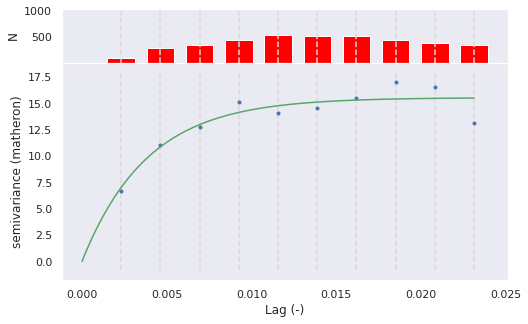

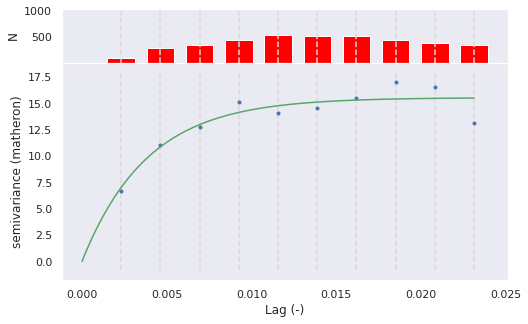

In [51]:
#Se hace el variograma, para los datos de perepciones, y se ajusta

VPR = skg.Variogram(DVTKPAg[["latitud","longitud"]].values,
                  np.reshape(DVTKPAg[["valorconsenso"]].values,[96,]),
                  normalize=False,
                  model="exponential")
VPR.maxlag = 0.6
VPR.n_lags = 10
print(VPR)
VPR.plot()

Text(0.5, 1.0, 'Percepción de seguridad\npor zona.\n')

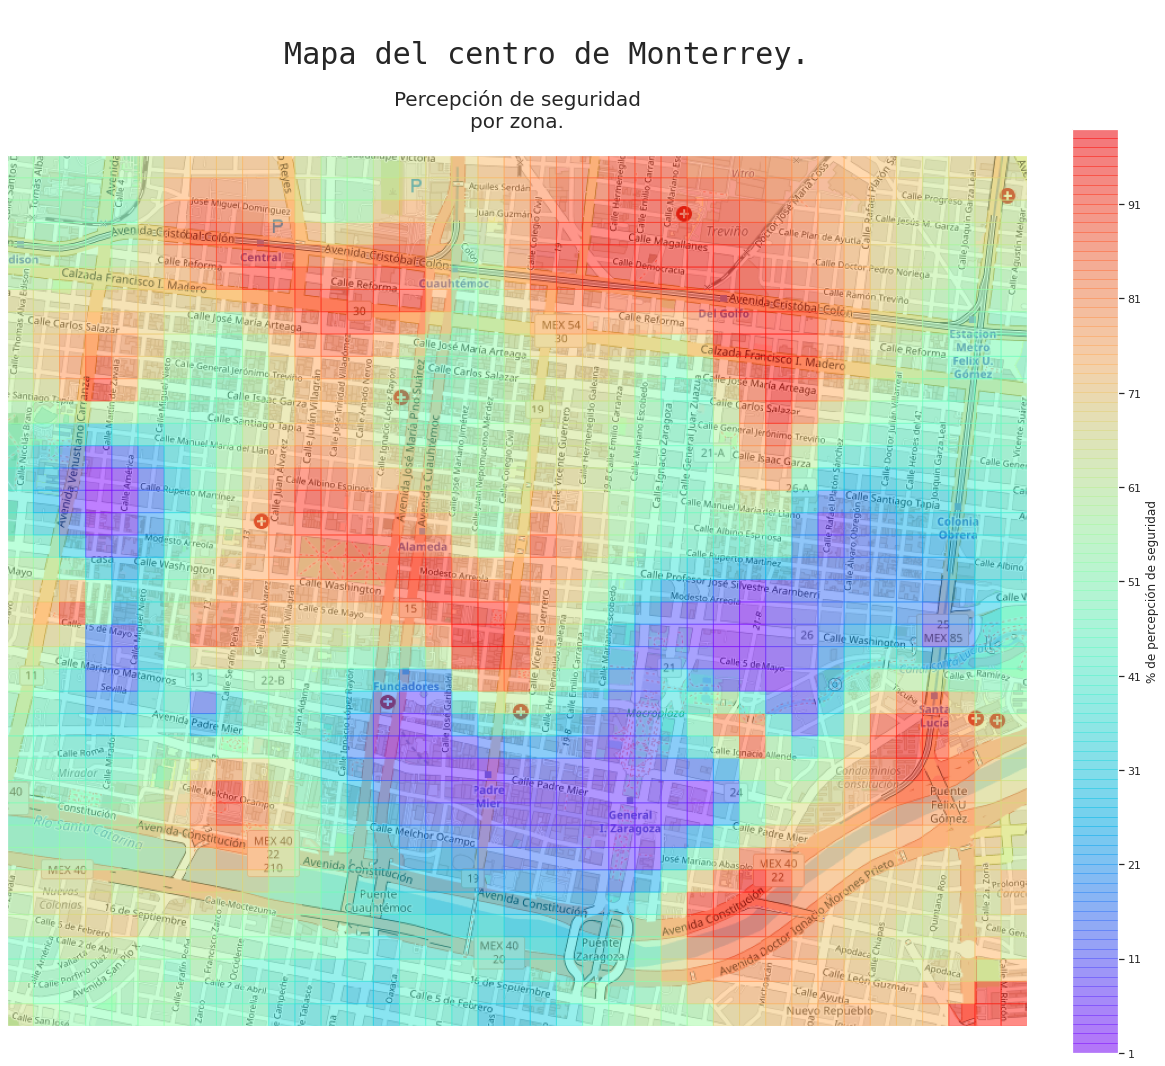

In [52]:
ok = OrdinaryKriging(VPR, min_points=1, max_points=20, mode='estimate')

xx, yy = np.mgrid[25.66:25.69:40j,-100.334:-100.295:40j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)

extent=(-100.334, -100.295,25.66, 25.69)
lon = np.linspace(extent[0],extent[1],field.shape[0])
lat = np.linspace(extent[2],extent[3],field.shape[1])
Lat,Lon = np.meshgrid(lat,lon)


ctr_hh = ax.contourf(xx, yy, field,
                     range(1,100,1),
                     cmap = "rainbow", 
                     alpha = 0.5)

sns.set(rc={'figure.figsize':(20,17)})

request = cimgt.OSM()
fig, ax = plt.subplots(subplot_kw=dict(projection=request.crs))

xynpsmesh = ax.projection.transform_points(ccrs.Geodetic(),
                                       Lon, Lat)

xynps = ax.projection.transform_points(ccrs.Geodetic(),
                                       DVTKPAg.longitud.values, DVTKPAg.latitud.values)


LatN = np.reshape(xynpsmesh[:,:,1:2],(40,40))

LonN = np.reshape(xynpsmesh[:,:,0:1],(40,40))


plt.colorbar(ctr_hh,fraction=0.046, pad=0.04, label = '% de percepción de seguridad')



extent = [-100.334, -100.295,25.66, 25.69]
ax.set_extent(extent)

ax.add_image(request,15)

ax.pcolormesh(LonN,LatN,(field.T),alpha=0.5,edgecolors='face', cmap="rainbow",
              antialiased=True, rasterized=True,snap=False)

plt.suptitle("\nMapa del centro de Monterrey.", size=30,**{'fontname':'monospace'})
plt.title("Percepción de seguridad\npor zona.\n", size=20)

In [53]:
#Se hace un geodataframe con los valores encontrados por Krigeaje
geoPDP = pd.DataFrame(np.reshape(field.T[:-1,:-1],(1521,)), columns=["data"])
geoPDP["id"] = list(np.arange(0,1521))


In [54]:
#Hacemos máscaras de valores pra filtrar las zonas
espVDF = np.where(geoPDP["data"]<4,1,0)
espADF = np.where((geoPDP["data"]>=4)&(geoPDP["data"]<=7),1,0)
espRDF = np.where(geoPDP["data"]>7,1,0)

#Asignamos a la tabla de datos
geoPDP["verde"] = espVDF
geoPDP["amarillo"] = espADF
geoPDP["rojo"] = espRDF

In [55]:
#Se visualiza usando Folium

mtyP = folium.Map(location=centroide, zoom_start=15, tiles=None)

folium.TileLayer(
          'openstreetmap', #Se escoge un mapa base que muestre locaciones
          name = 'Mapa base' #Nombre del mapa base
          ).add_to(mtyP)

folium.Choropleth(
            geo_data=geogridjson, #el GeoJson generado anteriormente
            data=geoPDP, #GeoDataFrame con los valores
            columns=["id","data"],  #Columnas a utilizar
            key_on='feature.properties.id', #Columna con clave en común
            fill_color='Reds', #Mapa de color en rojo
            nan_fill_color="Green", 
            fill_opacity=0.4, #opacidad al 60%
            line_opacity=0,
            bins=100, #~100 grupos para el mapa de color
            legend_name='Percepción de inseguridad', #Leyenda para la barra de color indicadora
            highlight=True,
            name="Mapa de percepciones").add_to(mtyP) #Nombre de la capa

folium.LayerControl().add_to(mtyP) #Se agrega un control de capas

mtyP

En la parte final se usa el polígono para recortar a grilla que se hizo para los mapas, y hacerlo más estético, siguiendo los siguientes paso

* Descargar el polígono de la página de <a href="https://www.google.com/maps/d/edit?mid=1THbE6x28l1SRBV8Bkjkyp1EsmoLuQZs&usp=sharing">MyMaps</a> en formato KML
* Usar la página de <a href="https://geojson.io/">Geojson.io</a> para convertir el archivo en un GeoJson
* Recortar la grilla usando <a href="https://mapshaper.org/">MapShaper</a>, con el comando "-clip XXXXXX -filter-slivers" donde "XXXXXX" es el nombre de la capa del polígono en la página de MapShaper
* Exportar el mapa como GeoJson, y cargarlo en el entorno para usarlos en los mapas (Disponible el nuevo archivo GeoJson en el Repositorio)


Con ésto podemos visualizar todos los mapas creados de una forma más limpia y estética.

In [56]:
#Se carga el archivo

geogridjson = gpd.read_file("newgeojson.geojson").to_json()

In [57]:
DvTPDF

WKT Nombre Descripción  name grupo  \
0    POINT (-100.3198514 25.6757095)    PR1         PR1   PR1    PR   
1    POINT (-100.3212676 25.6753614)    PR2         PR2   PR2    PR   
2    POINT (-100.3183923 25.6748676)    PR3         PR3   PR3    PR   
3    POINT (-100.3185615 25.6743948)    PR4         PR4   PR4    PR   
4    POINT (-100.3182825 25.6758065)    PR5         PR5   PR5    PR   
..                               ...    ...         ...   ...   ...   
200  POINT (-100.3074623 25.6716105)   PV57        PV57  PV57    PV   
201  POINT (-100.3042115 25.6700754)   PV58        PV58  PV58    PV   
202  POINT (-100.2986861 25.6728119)   PV59        PV59  PV59    PV   
203  POINT (-100.2986861 25.6724542)   PV60        PV60  PV60    PV   
204  POINT (-100.3138031 25.6768949)   PV61        PV61  PV61    PV   

                    coordenadas    longitud    latitud  datos  color  
0    [-100.3198514, 25.6757095] -100.319851  25.675709     10    red  
1    [-100.3212676, 25.6753614] -100.321268  25.675361     10    red  
2    [-100.3183923, 25.6748676] -100.318392  25.674868     10    red  
3    [-100.3185615, 25.6743948] -100.318562  25.674395     10    red  
4    [-100.3182825, 25.6758065] -100.318282  25.675807     10    red  
..                          ...         ...        ...    ...    ...  
200  [-100.3074623, 25.6716105] -100.307462  25.671610      1  green  
201  [-100.3042115, 25.6700754] -100.304211  25.670075      1  green  
202  [-100.2986861, 25.6728119] -100.298686  25.672812      1  green  
203  [-100.2986861, 25.6724542] -100.298686  25.672454      1  green  
204  [-100.3138031, 25.6768949] -100.313803  25.676895      1  green  

[205 rows x 10 columns]

In [58]:
#Se visualizan todos los mapas usando Folium

mtyP = folium.Map(location=centroide, zoom_start=13, tiles=None)

folium.TileLayer(
          'openstreetmap', #Se escoge un mapa base que muestre locaciones
          name = 'Mapa base' #Nombre del mapa base
          ).add_to(mtyP)

#folium.Choropleth(
#            geo_data=geogridjsonP, #el GeoJson generado anteriormente
#            data=geoPDP, #GeoDataFrame con los valores
#            columns=["id","data"],  #Columnas a utilizar
#            key_on='feature.properties.id', #Columna con clave en común
#            fill_color='Reds', #Mapa de color en rojo
#            nan_fill_color="Green", 
#            fill_opacity=0.4, #opacidad al 40%
#           line_opacity=0,
#            bins=10, #150 grupos para el mapa de color
#            legend_name='Percepción de inseguridad', #Leyenda para la barra de color indicadora
#            highlight=True,
#            name="Mapa de percepciones").add_to(mtyP) #Nombre de la capa

bajo = folium.Choropleth(
    geo_data=geogridjson, #el GeoJson generado anteriormente
    data=geoPDP, #GeoDataFrame con los valores
    columns=["id","verde"],  #Columnas a utilizar
    key_on='feature.properties.id', #Columna con clave en común
    fill_color='Reds', #Mapa de color en rojo
    nan_fill_color="Green", 
    fill_opacity=0.3, #opacidad al 30%
    line_opacity=0,
    bins=10, #10 grupos para el mapa de color
    legend_name='Percepción de inseguridad bajo', #Leyenda para la barra de color indicadora
    highlight=True,
    name="Mapa de percepción de inseguridad | Bajo",
    show=False) #Nombre de la capa

for key in bajo._children:
    if key.startswith('color_map'):
        del(bajo._children[key])

bajo.add_to(mtyP)


medio = folium.Choropleth(
    geo_data=geogridjson, #el GeoJson generado anteriormente
    data=geoPDP, #GeoDataFrame con los valores
    columns=["id","amarillo"],  #Columnas a utilizar
    key_on='feature.properties.id', #Columna con clave en común
    fill_color='Reds', #Mapa de color en rojo
    nan_fill_color="Green", 
    fill_opacity=0.3, #opacidad al 30%
    line_opacity=0,
    bins=10, #10 grupos para el mapa de color
    legend_name='Percepción de inseguridad bajo', #Leyenda para la barra de color indicadora
    highlight=True,
    name="Mapa de percepción de inseguridad | Medio",
    show=False) #Nombre de la capa

for key in medio._children:
    if key.startswith('color_map'):
        del(medio._children[key])

medio.add_to(mtyP)

alto = folium.Choropleth(
    geo_data=geogridjson, #el GeoJson generado anteriormente
    data=geoPDP, #GeoDataFrame con los valores
    columns=["id","rojo"],  #Columnas a utilizar
    key_on='feature.properties.id', #Columna con clave en común
    fill_color='Reds', #Mapa de color en rojo
    nan_fill_color="Green", 
    fill_opacity=0.3, #opacidad al 30%
    line_opacity=0,
    bins=10, #100 grupos para el mapa de color
    legend_name='Percepción de inseguridad bajo', #Leyenda para la barra de color indicadora
    highlight=True,
    name="Mapa de percepción de inseguridad | Alto",
    show=False) #Nombre de la capa

for key in alto._children:
    if key.startswith('color_map'):
        del(alto._children[key])

alto.add_to(mtyP)


folium.Choropleth(
            geo_data=geogridjson, #el GeoJson generado anteriormente
            data=geoPD, #GeoDataFrame con los valores
            columns=["id","data"],  #Columnas a utilizar
            key_on='feature.properties.id', #Columna con clave en común
            fill_color='Reds', #Mapa de color en rojo
            nan_fill_color="Green", 
            fill_opacity=0.6, #opacidad al 60%
            line_opacity=0,
            bins=100, #100 grupos para el mapa de color
            legend_name='Número de llamadas al 911', #Leyenda para la barra de color indicadora
            highlight=True,
            name="Mapa número de llamadas al 911 por delitos de violencia de género (por cuadra)").add_to(mtyP) #Nombre de la capa


clustersP = folium.FeatureGroup(name='Puntos percepciones', show=True)

for i,data in DvTPDF.iterrows():
  fillcolor=data.color
  clustersP.add_child(folium.CircleMarker(location=(data.latitud,data.longitud),
                                          fill_color=fillcolor, weight = 2,
                                          fill_opacity=0.7,radius=5, color='white'))

mtyP.add_child(clustersP)


clustersD = folium.FeatureGroup(name='Puntos denuncias al 911', show=False)


for _, reporte in rep911HRAreaDel_agrupados.iterrows():
  if reporte.Porcentaje_reportes>0.866:
    fillcolor = "darkred"
  elif reporte.Porcentaje_reportes>0.66:
    fillcolor = "orange"
  else:
    fillcolor = "darkgreen"
  
  clustersD.add_child(folium.CircleMarker(location=(reporte.latitud, reporte.longitud),
                                          fill_color=fillcolor, weight = 2,
                                          fill_opacity=0.7,
                                          color="black",
                                          radius=10,tooltip=f"Número de denuncias: {reporte.conteo}"))

mtyP.add_child(clustersD)



folium.LayerControl().add_to(mtyP) #Se agrega un control de capas



mtyP

In [59]:
#Guardado del mapa para publicarlo

mtyP.save("Mapa.html")

###Conclusión

Es indiscutible (al menos visualmente) que existe una relación entre zonas percibidas como inseguras a aquellas donde se han realizado más reportes por delitos de violencia de género al 911.

Existiendo concordancia en casi todas las zonas, hay dos puntos que señalar:

* A pesar que la grilla corresponiente a la estación Cuauhtémoc es la zona con más reportes al 911 en la zona, sólo sus alrededores son considerados como inseguros, mientras que la estación misma baja de categoría en cuanto a la percepción de inseguridad.

* Lo mismo pasa con la grilla correspondiente a la estación Fundadores.

Esto puede deberse a que las usuarias censadas puedan percibir más inseguro estar afuera de una instalación que dentro de la misma. Explicar y estudiar éste sesgo merece un análisis a parte, y recolección más exhausitiva de datos, estando fuera del alcance de éste análisis. Sin embargo las conclusiones se mantienen para la mayoría de las zonas/grillas además de existir concordancia entre las capas de percepción de seguridad alta e intermedia con el mapa generado por interpolación utilizando la técnica de Krigeado.

Dado que éste análisis sólo se enfoca en una evaluación visual de la información, una futura dirección podría ser generar una metrica de concordancia/similaridad entre las grillas para establecer que tan parecidas son unas zonas con otras.